In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_info = pd.read_csv('./data/ml-100k/u.info')
print(dataset_info)

        943 users
0      1682 items
1  100000 ratings


In [3]:
col_names = ['user id', 'movie id', 'rating', 'timestamp']
ratings = pd.read_csv('./data/ml-100k/u.data', sep='\t', names=col_names)
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
col_names = ['movie id', 'movie title', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']

In [7]:
items = pd.read_csv('./data/ml-100k/u.item', sep='|', names=col_names, encoding='latin-1')
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [9]:
movies = items[['movie id', 'movie title']]
movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
dataset = pd.merge(ratings, movies, how='inner', on='movie id')
dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [11]:
average_movies_ratings = dataset.groupby(['movie title']).mean()['rating']
average_movies_ratings.head()

movie title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [12]:
average_movies_ratings = average_movies_ratings.sort_values(ascending=False)
average_movies_ratings = average_movies_ratings.to_frame()
average_movies_ratings.head(5)


,rating
movie title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [13]:
star_on_5_average = len(average_movies_ratings[average_movies_ratings['rating'] == 5.0])
star_on_4_to_5_average = len(average_movies_ratings[(average_movies_ratings['rating'] >= 3.0) & 
                                                (average_movies_ratings['rating'] < 4.0)])
star_on_3_to_4_average = len(average_movies_ratings[(average_movies_ratings['rating'] >= 3.0) & 
                                                (average_movies_ratings['rating'] < 4.0)])
star_on_2_to_3_average = len(average_movies_ratings[(average_movies_ratings['rating'] >= 2.0 ) & 
                                                (average_movies_ratings['rating'] < 3.0)])
star_on_1_to_2_average = len(average_movies_ratings[(average_movies_ratings['rating'] >= 1.0) & 
                                                (average_movies_ratings['rating'] < 2)])


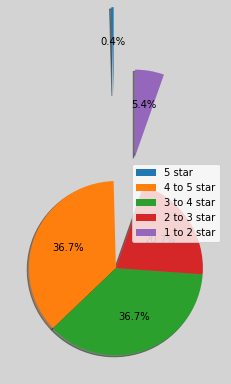

In [14]:
labels = ['5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star']
nums = [star_on_5_average, star_on_4_to_5_average, star_on_3_to_4_average, star_on_2_to_3_average, star_on_1_to_2_average]

fig, ax = plt.subplots()
fig.set_facecolor('lightgrey')

explode = (2, 0, 0, 0, 1.3)

patches, texts, auto = ax.pie(nums, shadow=True, startangle=90, explode=explode, autopct='%.1f%%')
plt.legend(patches, labels, loc="best")


In [15]:
average_highest_movies_ratings = average_movies_ratings[average_movies_ratings['rating'] == 5.0]
print("Film suggestion to new user based on highest average ratings: ")
average_highest_movies_ratings

Film suggestion to new user based on highest average ratings: 


,rating
movie title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
"Great Day in Harlem, A (1994)",5.0
Aiqing wansui (1994),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0


In [16]:
movies_views = dataset.groupby(['movie title']).count()['rating']
movies_views.head()

movie title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: rating, dtype: int64

In [17]:
movies_views = movies_views.sort_values(ascending=False)
movies_views = movies_views.to_frame()
movies_views.reset_index(level=0, inplace=True)
movies_views.columns = ['movie title', 'Number of views']
movies_views.head()

,movie title,Number of views
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485


In [18]:
views_above_500 = len(movies_views[movies_views['Number of views'] >= 500])
views_from_400_to_500 = len(movies_views[(movies_views['Number of views'] >= 400) & 
                                                (movies_views['Number of views'] < 500)])
views_from_300_to_400 = len(movies_views[(movies_views['Number of views'] >= 300) & 
                                                (movies_views['Number of views'] < 400)])
views_from_200_to_300 = len(movies_views[(movies_views['Number of views'] >= 200) & 
                                                (movies_views['Number of views'] < 300)])
views_from_100_to_200 = len(movies_views[(movies_views['Number of views'] >= 100) & 
                                                (movies_views['Number of views'] < 200)])

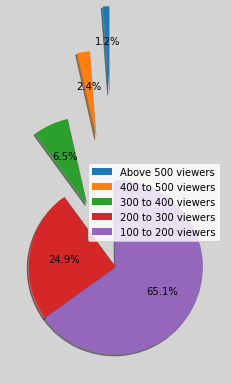

In [19]:
labels = ['Above 500 viewers', '400 to 500 viewers', '300 to 400 viewers', '200 to 300 viewers', '100 to 200 viewers']
nums =  [views_above_500, views_from_400_to_500, views_from_300_to_400, views_from_200_to_300, views_from_100_to_200]
fig, ax = plt.subplots()

fig.set_facecolor('lightgrey')
explode = (2, 1.5, 0.8, 0, 0)

patches, texts, auto = ax.pie(nums, shadow=True, startangle=90, explode=explode, autopct='%.1f%%')
plt.legend(patches, labels)


In [20]:
highest_movies_views = movies_views[movies_views['Number of views'] >= 350]
print("Film suggestion to new user based on top views: ")
highest_movies_views

Film suggestion to new user based on top views: 


,movie title,Number of views
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


In [21]:
reliable_movies = pd.merge(average_movies_ratings, movies_views, how='inner', on='movie title')
reliable_movies

,movie title,rating,Number of views
0,They Made Me a Criminal (1939),5.0,1
1,Marlene Dietrich: Shadow and Light (1996),5.0,1
2,"Saint of Fort Washington, The (1993)",5.0,2
3,Someone Else's America (1995),5.0,1
4,Star Kid (1997),5.0,3
...,...,...,...
1659,"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
1660,King of New York (1990),1.0,1
1661,Touki Bouki (Journey of the Hyena) (1973),1.0,1
1662,"Bloody Child, The (1996)",1.0,1


In [22]:
highest_reliable_movies = reliable_movies[(reliable_movies['Number of views'] >= 350) & (reliable_movies['rating'] >= 3.5)]
print("Film suggestion should suggest to new users films that are not only highly rated but also viewed by many users")
highest_reliable_movies

Film suggestion should suggest to new users films that are not only highly rated but also viewed by many users


,movie title,rating,Number of views
23,Star Wars (1977),4.358491,583
32,"Silence of the Lambs, The (1991)",4.289744,390
34,"Godfather, The (1972)",4.283293,413
40,Raiders of the Lost Ark (1981),4.252381,420
45,Titanic (1997),4.245714,350
49,"Empire Strikes Back, The (1980)",4.204360,367
64,Fargo (1996),4.155512,508
101,Pulp Fiction (1994),4.060914,394
129,Return of the Jedi (1983),4.007890,507
236,Toy Story (1995),3.878319,452


In [23]:
themes = col_names[5:]
themes

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

<AxesSubplot:xlabel='Genre'>

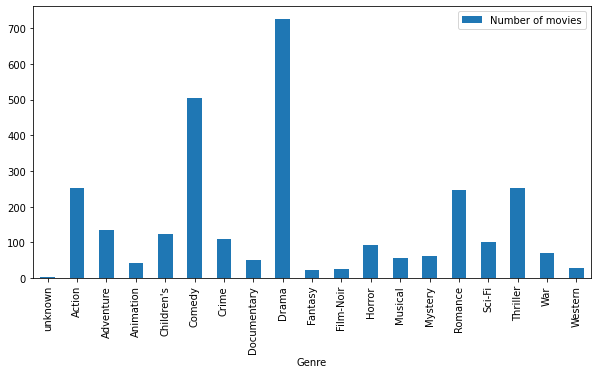

In [24]:
quantity_per_theme = []
for theme in themes:
    movies_by_theme = items[items[theme] == 1]
    quantity_per_theme.append(len(movies_by_theme))

quantity_per_theme

df = pd.DataFrame({'Genre': themes, 'Number of movies': quantity_per_theme})
df.plot.bar(x='Genre', y='Number of movies', rot=90, figsize=(10, 5))




In [25]:
def movies_by_theme_visualization(movies_by_theme):
    movies_by_theme['rating'].value_counts(sort=False).plot(kind='bar', figsize=(10, 5), use_index=True, rot=0)
    plt.title('Rating Frequency')
    plt.xlabel('Rating Score')
    plt.ylabel('Number of times a rating')
    plt.show()

In [26]:
def recommendations_by_theme(theme):
    if (theme != 'unknown'):
        print("Suggestions to new users films relating ", theme)
    else:
        print("Suggestions to new users films(no category)")
    
    print()

    movies_by_theme = items[['movie id', 'movie title', theme]]
    movies_by_theme =  movies_by_theme[movies_by_theme[theme] == 1]
    merged_movies_by_theme = pd.merge(ratings, movies_by_theme, how='inner', on='movie id')

    movies_by_theme_visualization(merged_movies_by_theme)

    average_rating_movies_by_theme = merged_movies_by_theme.groupby(['movie title'])['rating'].mean()
    average_rating_movies_by_theme = average_rating_movies_by_theme.sort_values(ascending=False)
    average_rating_movies_by_theme =  average_rating_movies_by_theme.to_frame()

    num_rating_movies_by_theme = merged_movies_by_theme.groupby(['movie title'])['rating'].count()
    num_rating_movies_by_theme = num_rating_movies_by_theme.sort_values(ascending=False)
    num_rating_movies_by_theme =  num_rating_movies_by_theme.to_frame()
    num_rating_movies_by_theme.reset_index(level=0, inplace=True)    
    num_rating_movies_by_theme.columns = ['movie title', 'Number of views']

    rated_popular_movies = pd.merge(average_rating_movies_by_theme, num_rating_movies_by_theme, how='inner', on='movie title')

    limited_view = 350
    limited_rating = 3.5

    count = 0
    check = 0
    while (limited_view > 0 and limited_rating > 0):
        top_related_popular_movies = rated_popular_movies[(rated_popular_movies['Number of views'] > limited_view) & (rated_popular_movies['rating'] > limited_rating)]

        if len(top_related_popular_movies) < 10:
            if check == 0:
                limited_view -= 50
                check = 1
            else:
                limited_rating -= 0.5
                check = 0    
        else:
            break
    
    print(f'Views: {limited_view} and rating: {limited_rating}')
    if len(top_related_popular_movies) > 0:
        print('Film system should suggest to new users films in below list: ')
        print(top_related_popular_movies)
    else :
        print('Film system should not suggest to new users films relating ', theme)



Suggestions to new users films(no category)



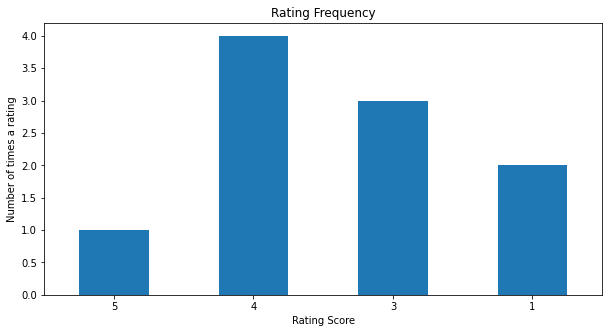

Views: 0 and rating: 0.5
Film system should not suggest to new users films relating  unknown
Suggestions to new users films relating  Action



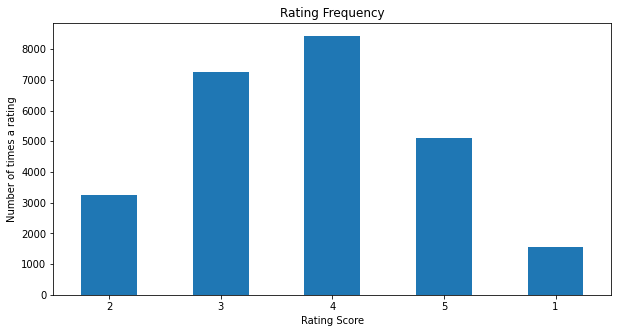

Views: 300 and rating: 3.5
Film system should suggest to new users films in below list: 
                                  movie title    rating  Number of views
0                            Star Wars (1977)  4.358491              583
1                       Godfather, The (1972)  4.283293              413
2              Raiders of the Lost Ark (1981)  4.252381              420
3                              Titanic (1997)  4.245714              350
4             Empire Strikes Back, The (1980)  4.204360              367
8                  Princess Bride, The (1987)  4.172840              324
11                       Fugitive, The (1993)  4.044643              336
13                  Return of the Jedi (1983)  4.007890              507
20                     Terminator, The (1984)  3.933555              301
22  Indiana Jones and the Last Crusade (1989)  3.930514              331
34                        Men in Black (1997)  3.745875              303
37                           Rock, 

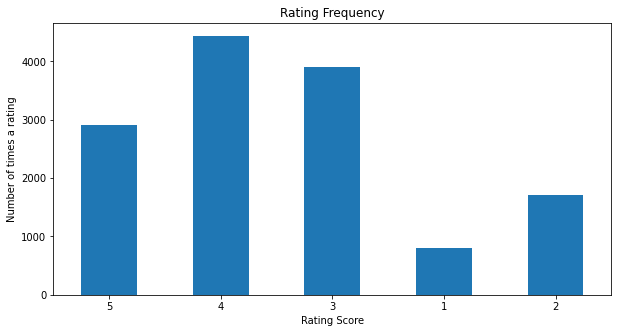

Views: 300 and rating: 3.5
Film system should suggest to new users films in below list: 
                                     movie title    rating  Number of views
1                               Star Wars (1977)  4.358491              583
2                 Raiders of the Lost Ark (1981)  4.252381              420
4                Empire Strikes Back, The (1980)  4.204360              367
6                     Princess Bride, The (1987)  4.172840              324
11                     Return of the Jedi (1983)  4.007890              507
15     Indiana Jones and the Last Crusade (1989)  3.930514              331
23                           Men in Black (1997)  3.745875              303
25                              Rock, The (1996)  3.693122              378
27               Star Trek: First Contact (1996)  3.660274              365
28  Willy Wonka and the Chocolate Factory (1971)  3.631902              326
Suggestions to new users films relating  Animation



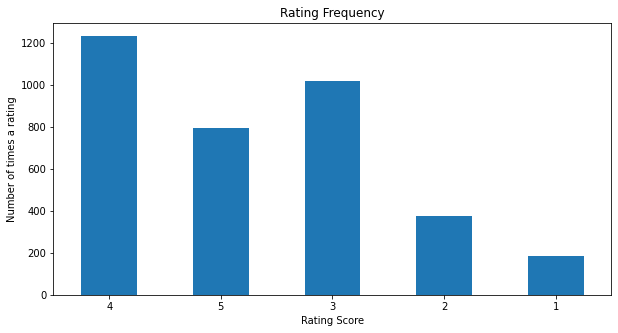

Views: 100 and rating: 1.5
Film system should suggest to new users films in below list: 
                               movie title    rating  Number of views
0                    Close Shave, A (1995)  4.491071              112
1               Wrong Trousers, The (1993)  4.466102              118
5                         Toy Story (1995)  3.878319              452
6                           Aladdin (1992)  3.812785              219
8              Beauty and the Beast (1991)  3.792079              202
9                    Lion King, The (1994)  3.781818              220
10                         Fantasia (1940)  3.770115              174
11  Snow White and the Seven Dwarfs (1937)  3.709302              172
12                        Pinocchio (1940)  3.673267              101
15                       Cinderella (1950)  3.581395              129
17                            Dumbo (1941)  3.495935              123
20     Hunchback of Notre Dame, The (1996)  3.377953              127
2

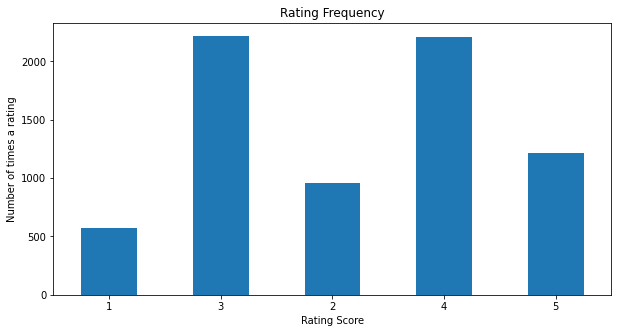

Views: 150 and rating: 2.0
Film system should suggest to new users films in below list: 
                                     movie title    rating  Number of views
1                       Wizard of Oz, The (1939)  4.077236              246
2                                    Babe (1995)  3.995434              219
3                               Toy Story (1995)  3.878319              452
4              E.T. the Extra-Terrestrial (1982)  3.833333              300
5                                 Aladdin (1992)  3.812785              219
7                    Beauty and the Beast (1991)  3.792079              202
8                          Lion King, The (1994)  3.781818              220
9                                Fantasia (1940)  3.770115              174
10                           Mary Poppins (1964)  3.724719              178
11        Snow White and the Seven Dwarfs (1937)  3.709302              172
15  Willy Wonka and the Chocolate Factory (1971)  3.631902              326

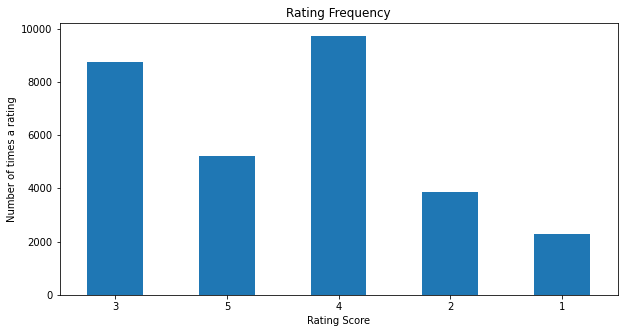

Views: 250 and rating: 3.0
Film system should suggest to new users films in below list: 
                                      movie title    rating  Number of views
7                      Princess Bride, The (1987)  4.172840              324
14         Monty Python and the Holy Grail (1974)  4.066456              316
45                         Full Monty, The (1997)  3.926984              315
49                 When Harry Met Sally... (1989)  3.910345              290
55                               Toy Story (1995)  3.878319              452
58                         Raising Arizona (1987)  3.875000              256
61                            Forrest Gump (1994)  3.853583              321
63                     Blues Brothers, The (1980)  3.836653              251
64                      Back to the Future (1985)  3.834286              350
79                           Groundhog Day (1993)  3.764286              280
82                            Men in Black (1997)  3.745875     

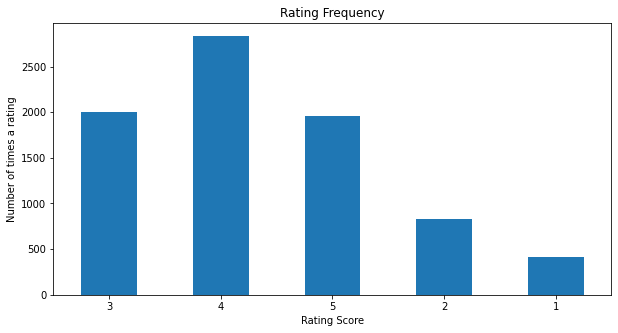

Views: 200 and rating: 2.5
Film system should suggest to new users films in below list: 
                       movie title    rating  Number of views
1       Usual Suspects, The (1995)  4.385768              267
3            Godfather, The (1972)  4.283293              413
5   Godfather: Part II, The (1974)  4.186603              209
6         L.A. Confidential (1997)  4.161616              297
7                     Fargo (1996)  4.155512              508
10             Pulp Fiction (1994)  4.060914              394
11               Sting, The (1973)  4.058091              241
19               GoodFellas (1990)  3.951327              226
21            Seven (Se7en) (1995)  3.847458              236
31                     Heat (1995)  3.569507              223
40                   Batman (1989)  3.427861              201
Suggestions to new users films relating  Documentary



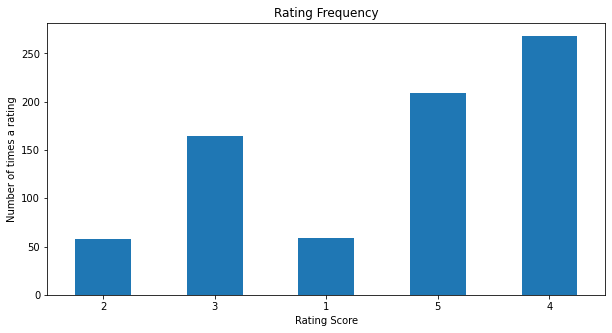

Views: 0 and rating: 0.5
Film system should suggest to new users films in below list: 
                     movie title    rating  Number of views
4             Hoop Dreams (1994)  4.094017              117
13  Celluloid Closet, The (1995)  3.892857               56
16                  Crumb (1994)  3.790123               81
20    Looking for Richard (1996)  3.727273               55
23          Koyaanisqatsi (1983)  3.490566               53
Suggestions to new users films relating  Drama



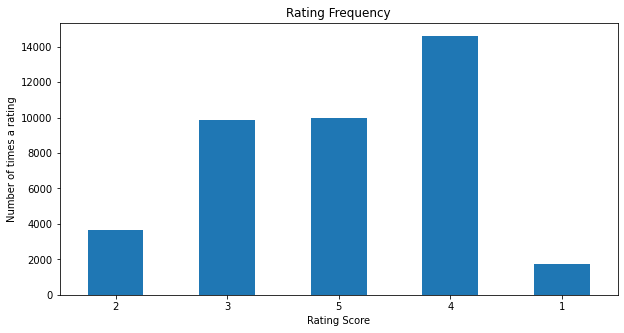

Views: 350 and rating: 3.5
Film system should suggest to new users films in below list: 
                          movie title    rating  Number of views
19   Silence of the Lambs, The (1991)  4.289744              390
20              Godfather, The (1972)  4.283293              413
26    Empire Strikes Back, The (1980)  4.204360              367
35                       Fargo (1996)  4.155512              508
54                Pulp Fiction (1994)  4.060914              394
128                Chasing Amy (1997)  3.839050              379
142                    Contact (1997)  3.803536              509
146             Twelve Monkeys (1995)  3.798469              392
181              Jerry Maguire (1996)  3.710938              384
208       English Patient, The (1996)  3.656965              481
Suggestions to new users films relating  Fantasy



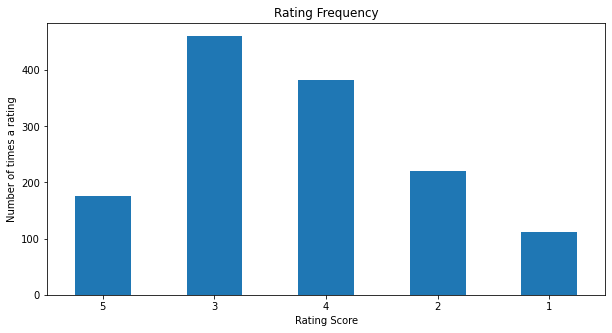

Views: 0 and rating: 0.5
Film system should suggest to new users films in below list: 
                            movie title    rating  Number of views
1     E.T. the Extra-Terrestrial (1982)  3.833333              300
2             Heavenly Creatures (1994)  3.671429               70
3   20,000 Leagues Under the Sea (1954)  3.500000               72
4                        Jumanji (1995)  3.312500               96
5                      Mask, The (1994)  3.193798              129
6                    Dragonheart (1996)  3.082278              158
10          Nutty Professor, The (1996)  2.914110              163
12                     Space Jam (1996)  2.774194               93
13                       Flubber (1997)  2.754717               53
Suggestions to new users films relating  Film-Noir



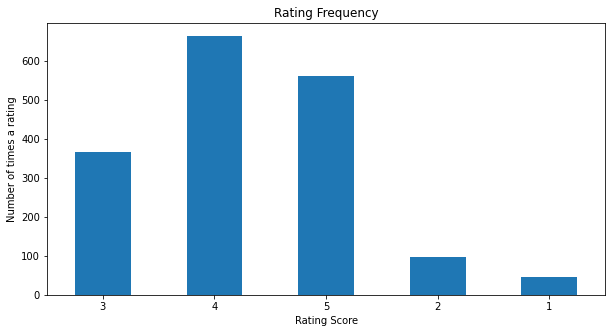

Views: 50 and rating: 1.0
Film system should suggest to new users films in below list: 
                         movie title    rating  Number of views
0   Manchurian Candidate, The (1962)  4.259542              131
2         Maltese Falcon, The (1941)  4.210145              138
3                Sunset Blvd. (1950)  4.200000               65
4           L.A. Confidential (1997)  4.161616              297
5                Blade Runner (1982)  4.138182              275
6                   Chinatown (1974)  4.136054              147
7                   Notorious (1946)  4.115385               52
9              Big Sleep, The (1946)  4.027397               73
14                  Cape Fear (1962)  3.523256               86
16              Grifters, The (1990)  3.483146               89
17      Devil in a Blue Dress (1995)  3.385965               57
19                    Hoodlum (1997)  2.931507               73
20           Mulholland Falls (1996)  2.878049               82
Suggestions to n

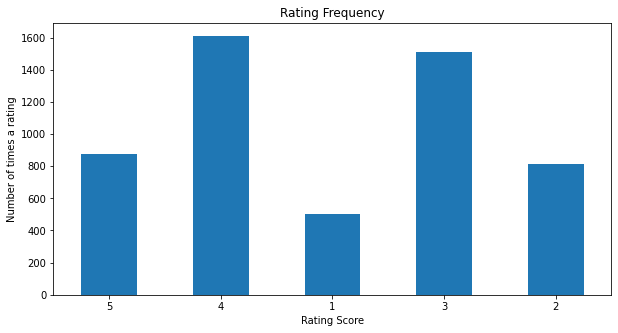

Views: 100 and rating: 1.5
Film system should suggest to new users films in below list: 
                          movie title    rating  Number of views
0                       Psycho (1960)  4.100418              239
1                        Alien (1979)  4.034364              291
2           Young Frankenstein (1974)  3.945000              200
4                 Shining, The (1980)  3.825243              206
5                   Birds, The (1963)  3.808642              162
6                         Jaws (1975)  3.775000              280
12       Devil's Advocate, The (1997)  3.515957              188
13                      Carrie (1976)  3.504132              121
15                      Scream (1996)  3.441423              478
16            Army of Darkness (1993)  3.431034              116
21            Frighteners, The (1996)  3.234783              115
22                    Scream 2 (1997)  3.216981              106
24  Interview with the Vampire (1994)  3.182482              137
2

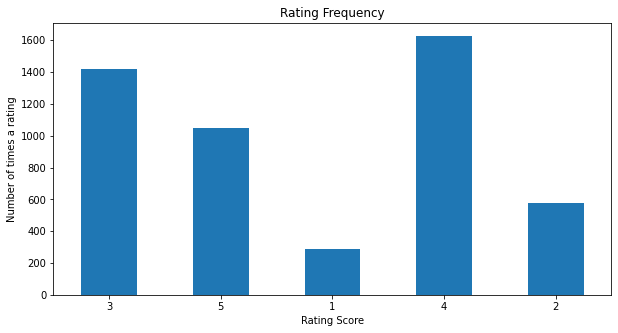

Views: 150 and rating: 2.0
Film system should suggest to new users films in below list: 
                               movie title    rating  Number of views
0                 Wizard of Oz, The (1939)  4.077236              246
4                This Is Spinal Tap (1984)  3.905759              191
6               Blues Brothers, The (1980)  3.836653              251
8                           Aladdin (1992)  3.812785              219
9              Beauty and the Beast (1991)  3.792079              202
10                   Lion King, The (1994)  3.781818              220
11                         Fantasia (1940)  3.770115              174
12              Sound of Music, The (1965)  3.765766              222
14                     Mary Poppins (1964)  3.724719              178
16  Snow White and the Seven Dwarfs (1937)  3.709302              172
35                           Grease (1978)  3.347059              170
38         Everyone Says I Love You (1996)  3.273810              168
4

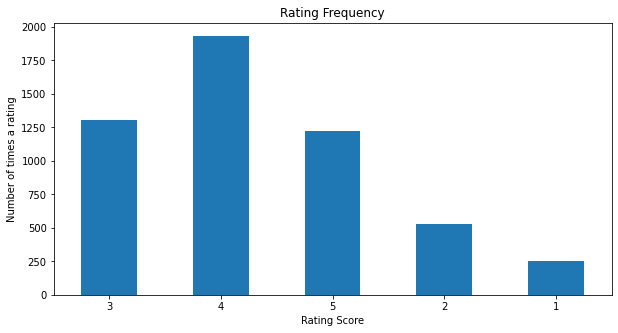

Views: 150 and rating: 2.0
Film system should suggest to new users films in below list: 
                     movie title    rating  Number of views
0             Rear Window (1954)  4.387560              209
2                 Vertigo (1958)  4.251397              179
4                 Amadeus (1984)  4.163043              276
5       L.A. Confidential (1997)  4.161616              297
10              Lone Star (1996)  4.053476              187
14  2001: A Space Odyssey (1968)  3.969112              259
23              Game, The (1997)  3.593625              251
27  Devil's Advocate, The (1997)  3.515957              188
28      Conspiracy Theory (1997)  3.423729              295
31               Cop Land (1997)  3.377143              175
36    Mission: Impossible (1996)  3.313953              344
43         Murder at 1600 (1997)  3.087156              218
Suggestions to new users films relating  Romance



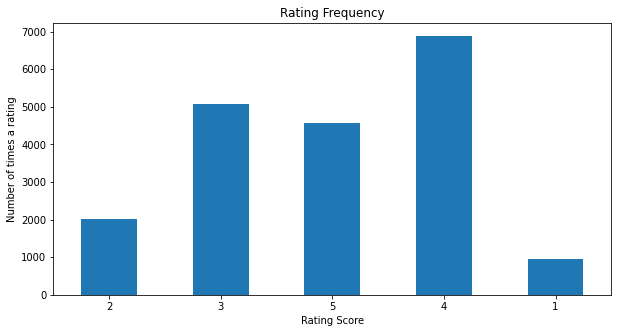

Views: 300 and rating: 3.0
Film system should suggest to new users films in below list: 
                         movie title    rating  Number of views
1                   Star Wars (1977)  4.358491              583
2                     Titanic (1997)  4.245714              350
3    Empire Strikes Back, The (1980)  4.204360              367
7         Princess Bride, The (1987)  4.172840              324
20         Return of the Jedi (1983)  4.007890              507
44               Forrest Gump (1994)  3.853583              321
45                Chasing Amy (1997)  3.839050              379
60              Jerry Maguire (1996)  3.710938              384
69       English Patient, The (1996)  3.656965              481
157                Saint, The (1997)  3.123418              316
Suggestions to new users films relating  Sci-Fi



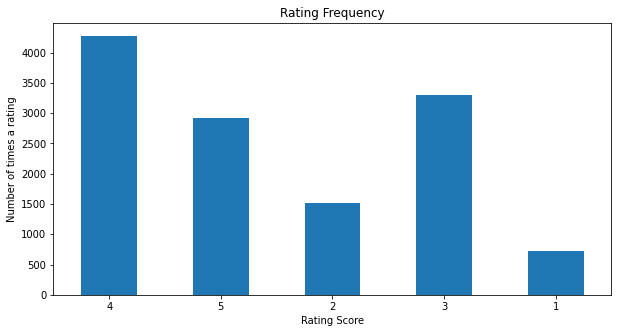

Views: 300 and rating: 3.0
Film system should suggest to new users films in below list: 
                        movie title    rating  Number of views
1                  Star Wars (1977)  4.358491              583
3   Empire Strikes Back, The (1980)  4.204360              367
6         Return of the Jedi (1983)  4.007890              507
11           Terminator, The (1984)  3.933555              301
15        Back to the Future (1985)  3.834286              350
19                   Contact (1997)  3.803536              509
20            Twelve Monkeys (1995)  3.798469              392
23              Men in Black (1997)  3.745875              303
25  Star Trek: First Contact (1996)  3.660274              365
37    Independence Day (ID4) (1996)  3.438228              429
Suggestions to new users films relating  Thriller



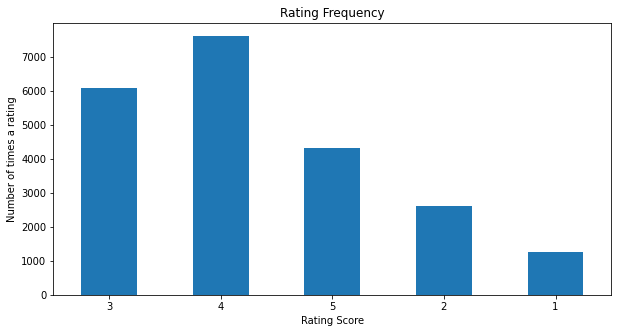

Views: 250 and rating: 3.0
Film system should suggest to new users films in below list: 
                           movie title    rating  Number of views
2           Usual Suspects, The (1995)  4.385768              267
5     Silence of the Lambs, The (1991)  4.289744              390
11            L.A. Confidential (1997)  4.161616              297
12                        Fargo (1996)  4.155512              508
20                Fugitive, The (1993)  4.044643              336
21                        Alien (1979)  4.034364              291
24   Terminator 2: Judgment Day (1991)  4.006780              295
34        2001: A Space Odyssey (1968)  3.969112              259
36                       Aliens (1986)  3.947183              284
37              Terminator, The (1984)  3.933555              301
39                    Apollo 13 (1995)  3.931159              276
54                    Rock, The (1996)  3.693122              378
58                       Ransom (1996)  3.644195     

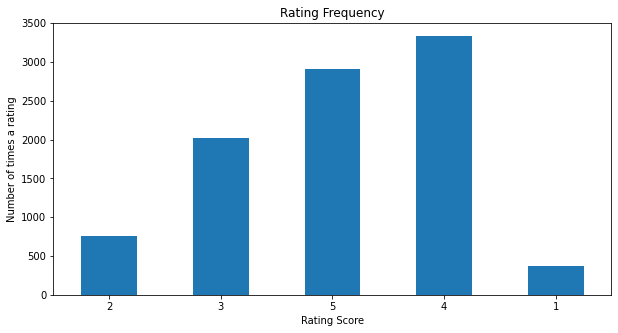

Views: 200 and rating: 2.5
Film system should suggest to new users films in below list: 
                        movie title    rating  Number of views
0           Schindler's List (1993)  4.466443              298
1                 Casablanca (1942)  4.456790              243
2                  Star Wars (1977)  4.358491              583
6   Empire Strikes Back, The (1980)  4.204360              367
7                  Boot, Das (1981)  4.203980              201
10                Braveheart (1995)  4.151515              297
16            Apocalypse Now (1979)  4.045249              221
17        Return of the Jedi (1983)  4.007890              507
21                    Aliens (1986)  3.947183              284
22                   M*A*S*H (1970)  3.912621              206
24              Forrest Gump (1994)  3.853583              321
32      English Patient, The (1996)  3.656965              481
36        Courage Under Fire (1996)  3.610860              221
44    Independence Day (ID4) 

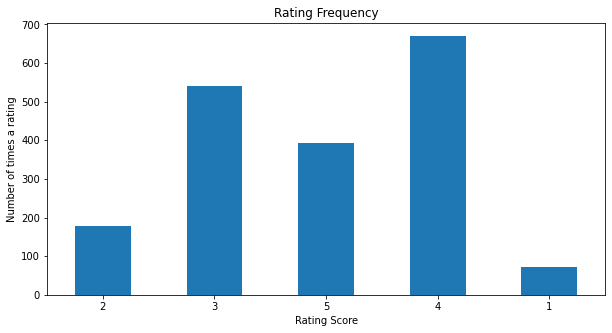

Views: 50 and rating: 1.0
Film system should suggest to new users films in below list: 
                                  movie title    rating  Number of views
0                            High Noon (1952)  4.102273               88
2   Butch Cassidy and the Sundance Kid (1969)  3.949074              216
3               Magnificent Seven, The (1954)  3.942149              121
5                           Unforgiven (1992)  3.868132              182
6      Good, The Bad and The Ugly, The (1966)  3.861314              137
8                   Dances with Wolves (1990)  3.792969              256
9                            Tombstone (1993)  3.666667              108
10                            Maverick (1994)  3.468750              128
11                 Legends of the Fall (1994)  3.456790               81
13                          Young Guns (1988)  3.207921              101
21                   Last Man Standing (1996)  2.660377               53


In [27]:
for theme in themes:
    recommendations_by_theme(theme)